## Data Cleaning

### The entire dataset

In [161]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime, DualMap, TimeSliderChoropleth
from IPython.display import HTML, Javascript, IFrame
import branca
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# load the entire dataset
nabr = pd.read_csv('./data/NABR_historic.csv')
nearterm = pd.read_csv('./data/nearterm_data_2020-2024.csv')

In [5]:
# lowercase column names
nabr.columns = nabr.columns.str.lower()
nearterm.columns = nearterm.columns.str.lower()

# merge the two datasets
df = pd.concat([nabr, nearterm], axis=0)

# save the cleaned data to a csv file
df.to_csv('./data/cleaned_data/final_data.csv', index=False)

### Greenery area dataset

In [203]:
# Greenery data
# extract the relevant data
greenery_columns = ['long', 'lat', 'year', 'rcp', 'treecanopy', 'bare', 'herb', 'ann_herb', 'litter', 'shrub']
greenery = df[greenery_columns]

# calculate the total greenery
greenery['total'] = greenery['treecanopy'] + greenery['herb'] + greenery['ann_herb'] + greenery['shrub'] + greenery['litter'] - greenery['bare'] 

# save the data to csv file
greenery.to_csv('./data/cleaned_data/greenery_data.csv', index=False)

### Plant litter dataset

In [35]:
# Plant litter dataset
# extract the relevant data
litter_columns = ['long', 'lat', 'year', 'rcp', 'litter', 't_winter', 't_summer', 't_annual']
litter = df[litter_columns]
litter = litter.drop_duplicates(subset=litter_columns)

# # fill the null values with the mean
# litter.loc[:, 't_winter'] = litter['t_winter'].fillna(litter['t_winter'].mean())
# litter.loc[:, 't_summer'] = litter['t_summer'].fillna(litter['t_summer'].mean())
# litter.loc[:, 't_annual'] = litter['t_annual'].fillna(litter['t_annual'].mean())

# drop the null values
litter = litter.dropna()

# save the data to csv file
litter.to_csv('./data/cleaned_data/litter_data.csv', index=False)

litter

,long,lat,year,rcp,litter,t_winter,t_summer,t_annual
0,-110.0472,37.60413,1980,historical,11,0.964835,23.15924,23.159240
1,-110.0472,37.60413,1980,historical,11,0.964835,23.15924,0.964835
5,-110.0472,37.60413,1981,historical,11,3.334444,23.27065,11.581320
7,-110.0472,37.60413,1982,historical,11,-0.015556,22.05707,9.472283
11,-110.0472,37.60413,1984,historical,11,-1.047253,21.95978,21.959780
...,...,...,...,...,...,...,...,...
55632,-109.9659,37.62525,2024,8.5,19,3.372912,23.75413,3.372912
55636,-109.9659,37.62525,2024,8.5,19,1.209121,23.48859,1.209121
55637,-109.9659,37.62525,2024,8.5,19,1.209121,23.48859,10.273350
55640,-109.9659,37.62525,2024,8.5,19,1.549945,23.86120,1.549945


### VWC dataset

In [46]:
# VWC data
# extract the relevant data
vwc_columns = ['long', 'lat', 'year', 'rcp', 'evap_summer', 'vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole', 'vwc_fall_whole']
vwc = df[vwc_columns]

# deal with NaN values
# fill the null values with the mean of the column
null_columns = ['vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole', 'vwc_fall_whole']
vwc.loc[:, null_columns] = vwc[null_columns].fillna(vwc[null_columns].mean())

# save it to a new csv file
vwc.to_csv('./data/cleaned_data/vwc_data.csv', index=False)

### Summer dataset

In [173]:
# summer related data
# extract the relevant data
summer_columns = ['long', 'lat', 'year', 'rcp', 'drysoildays_summer_whole', 'evap_summer', 'nondryswa_summer_whole', 'ppt_summer', 'tmax_summer', 'vwc_summer_whole']
summer = df[summer_columns]

# fill missing values with the mean
summer.loc[:, 'drysoildays_summer_whole'] = summer['drysoildays_summer_whole'].fillna(summer['drysoildays_summer_whole'].mean())
summer.loc[:, 'evap_summer'] = summer['evap_summer'].fillna(summer['evap_summer'].mean())
summer.loc[:, 'nondryswa_summer_whole'] = summer['nondryswa_summer_whole'].fillna(summer['nondryswa_summer_whole'].mean())
summer.loc[:, 'ppt_summer'] = summer['ppt_summer'].fillna(summer['ppt_summer'].mean())
summer.loc[:, 'tmax_summer'] = summer['tmax_summer'].fillna(summer['tmax_summer'].mean())

# round the columns
summer = summer.round({'drysoildays_summer_whole': 3, 'evap_summer': 3, 'nondryswa_summer_whole': 3, 'ppt_summer': 3, 'tmax_summer': 3})

# save the data to csv file
summer.to_csv('./data/cleaned_data/summer_data.csv', index=False)

### Summer vs. Winter dataset

In [9]:
# summer vs. winter data
# extract the relevant data
summer_winter_columns = ['long', 'lat', 'year', 'rcp', 'ppt_annual', 'ppt_summer', 'ppt_winter', 't_summer', 't_winter', 'tmax_summer', 'tmin_winter']
summer_winter = df[summer_winter_columns]

# save the data to csv file
summer_winter.to_csv('./data/cleaned_data/summer_winter_data.csv', index=False)

## Visualization

### Greenery area dataset

In [88]:
# load the data
greenery = pd.read_csv('./data/cleaned_data/greenery_data.csv')
greenery

/var/folders/27/cc8xpbnj4vgc0f2m9xmmtc_r0000gn/T/ipykernel_2972/4013972958.py:2: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



,long,lat,year,rcp,treecanopy,bare,herb,ann_herb,litter,shrub,total
0,-110.0472,37.60413,1980,historical,0,84,5,0,11,7,-61
1,-110.0472,37.60413,1980,historical,0,84,5,0,11,7,-61
2,-110.0472,37.60413,1980,historical,0,84,5,0,11,7,-61
3,-110.0472,37.60413,1980,historical,0,84,5,0,11,7,-61
4,-110.0472,37.60413,1980,historical,0,84,5,0,11,7,-61
...,...,...,...,...,...,...,...,...,...,...,...
69618,-109.9659,37.62525,2024,8.5,18,37,18,0,19,22,40
69619,-109.9659,37.62525,2024,8.5,18,37,18,0,19,22,40
69620,-109.9659,37.62525,2024,8.5,18,37,18,0,19,22,40
69621,-109.9659,37.62525,2024,8.5,18,37,18,0,19,22,40


In [107]:
greenery1 = greenery.groupby(['long', 'lat'])['total'].mean().reset_index()
greenery1

,long,lat,total
0,-110.0472,37.60413,-61.0
1,-110.0461,37.60334,-48.0
2,-110.0458,37.60308,-29.0
3,-110.0393,37.60519,-15.0
4,-110.0389,37.60545,-25.0
...,...,...,...
108,-109.9673,37.62868,-30.0
109,-109.9669,37.62446,-91.0
110,-109.9662,37.60783,-4.0
111,-109.9662,37.63159,50.0


In [93]:
# further data processing
greenery_total = greenery.groupby(['long', 'lat', 'year'])['total'].mean().reset_index()
greenery_total

,long,lat,year,total
0,-110.0472,37.60413,1980,-61.0
1,-110.0472,37.60413,1981,-61.0
2,-110.0472,37.60413,1982,-61.0
3,-110.0472,37.60413,1983,-61.0
4,-110.0472,37.60413,1984,-61.0
...,...,...,...,...
4854,-109.9659,37.62525,2018,40.0
4855,-109.9659,37.62525,2021,40.0
4856,-109.9659,37.62525,2022,40.0
4857,-109.9659,37.62525,2023,40.0


In [109]:
# create a folium heatmap of the 1980 data
map_center = [greenery_total['lat'].mean(), greenery_total['long'].mean()]
map_width = 800  
map_height = 600 
mymap_1980 = folium.Map(location=map_center, zoom_start=13, width=map_width, height=map_height)

heat_data_green = data_1980[['lat', 'long', 'total']].reset_index(drop=True).values.tolist()

# the higher the gradient, the more greenery there is. 
HeatMap(heat_data_green, radius=20, blur=10, gradient={0.2: 'red', 0.4: 'brown', 0.6: 'yellow', 0.8: '#32CD32', 1: 'green'}).add_to(mymap_1980)

mymap_1980

In [113]:
# create a folium heatmap of the 1980 data
map_center = [greenery_total['lat'].mean(), greenery_total['long'].mean()]
map_width = 800  
map_height = 600 
mymap_2024 = folium.Map(location=map_center, zoom_start=13, width=map_width, height=map_height)

heat_data_green = data_2024[['lat', 'long', 'total']].reset_index(drop=True).values.tolist()

# the higher the gradient, the more greenery there is. 
HeatMap(heat_data_green, radius=20, blur=10, gradient={0.2: 'red', 0.4: 'brown', 0.6: 'yellow', 0.8: '#32CD32', 1: 'green'}).add_to(mymap_2024)

mymap_2024

In [12]:
# create a folium heatmap
map_center = [greenery_total['lat'].mean(), greenery_total['long'].mean()]
map_width = 800  
map_height = 600 
mymap = folium.Map(location=map_center, zoom_start=13, width=map_width, height=map_height)

heat_data_green = greenery_total[['lat', 'long', 'total']].reset_index(drop=True).values.tolist()

In [13]:
# the higher the gradient, the more greenery there is. 
HeatMap(heat_data_green, radius=20, blur=10, gradient={0.2: 'red', 0.4: 'brown', 0.6: 'yellow', 0.8: '#32CD32', 1: 'green'}).add_to(mymap)

mymap

In [103]:
# consider year; slide the slider to see the changes in greenery over the years
greenery_year = greenery.groupby(['long', 'lat', 'year'])['total'].mean().reset_index()

In [106]:
styledict = {
    str(year): {
        'radius': 20,
        'blur': 10,
        'gradient': {0.2: 'red', 0.4: 'brown', 0.6: 'yellow', 0.8: '#32CD32', 1: 'green'},
        'data': greenery_year[year]
    } for year in greenery_year.keys()
}

mymap2 = folium.Map(location=map_center, zoom_start=13, width=map_width, height=map_height)

TimeSliderChoropleth(styledict).add_to(mymap2)

mymap2

TypeError: TimeSliderChoropleth.__init__() missing 1 required positional argument: 'styledict'

### Plant litter dataset

In [70]:
# load the data
litter = pd.read_csv('./data/cleaned_data/litter_data.csv')

In [71]:
# further data processing
litter_copy = litter.copy()
# drop long and lat and rcp columns
litter_copy = litter_copy.drop(columns=['long', 'lat', 'rcp'], axis=1)

# group by year and get the mean of the columns
litter_copy = litter_copy.groupby('year', as_index=False).agg({'litter': lambda x: x.mode().iloc[0], 
                                     't_winter': 'mean', 
                                     't_summer': 'mean', 
                                     't_annual': 'mean'})

# round the columns
litter_copy = litter_copy.round({'t_winter': 3, 't_summer': 3, 't_annual': 3})

litter_copy.head()

,year,litter,t_winter,t_summer,t_annual
0,1980,9,0.773,22.816,10.849
1,1981,9,3.239,22.874,10.993
2,1982,6,-0.201,21.620,11.135
3,1983,10,0.243,20.795,9.601
4,1984,6,-1.258,21.462,9.281


In [74]:
litter_copy.litter.unique()

array([ 9,  6, 10,  8])

In [72]:
litter_copy_2 = litter.copy()
# drop long and lat and rcp columns
litter_copy_2 = litter_copy_2.drop(columns=['long', 'lat', 'rcp', 'year'], axis=1)

# group by litter column
litter_copy_2 = litter_copy_2.groupby('litter', as_index=False).agg({'t_winter': 'mean', 
                                     't_summer': 'mean', 
                                     't_annual': 'mean'})

# round the columns
litter_copy_2 = litter_copy_2.round({'t_winter': 3, 't_summer': 3, 't_annual': 3})

litter_copy_2.head()

,litter,t_winter,t_summer,t_annual
0,1,0.669,23.375,11.700
1,2,1.068,23.999,12.444
2,3,1.015,23.804,12.093
3,5,0.737,23.440,11.589
4,6,0.900,23.800,12.057


In [73]:
litter_copy_2.litter.unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 24, 25, 26])

In [190]:
fig = px.scatter(litter_copy_2, x='litter', y='t_annual', trendline = 'ols', title='Relationship between Annual Temperature and Litter',color_discrete_sequence=['#A7C6DA'])

regression_line = fig.data[1]

fig.add_trace(go.Scatter(x=regression_line.x, y=regression_line.y, mode='lines', name='Trendline', line = dict(color='#CA68C8')))

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Litter',
    yaxis_title='Annual Temperature',
    width=1100, 
    height=600,
    xaxis=dict(
        showline=True,   
        linecolor='black'
    ),
    yaxis=dict(
        showline=True, 
        linecolor='black'
    )
)

fig.data[0].update(
    hovertemplate='Litter: %{x}<br>Annual Temperature: %{y:.3f}<extra></extra>'
)

fig.data[1].update(
    hovertemplate='Regression Line<br>x: %{x}<br>y: %{y:.3f}<extra></extra>'
)

fig.show()

### VWC dataset

In [166]:
# load the data
vwc = pd.read_csv('./data/cleaned_data/vwc_data.csv')
vwc.head()

,long,lat,year,rcp,evap_summer,vwc_winter_whole,vwc_spring_whole,vwc_summer_whole,vwc_fall_whole
0,-110.0472,37.60413,1980,historical,NaN,0.128169,0.112395,0.069182,0.095330
1,-110.0472,37.60413,1980,historical,NaN,0.128169,0.112395,0.069182,0.095330
2,-110.0472,37.60413,1980,historical,NaN,0.128169,0.112395,0.069182,0.095330
3,-110.0472,37.60413,1980,historical,NaN,0.128169,0.112395,0.069182,0.095330
4,-110.0472,37.60413,1980,historical,1.559807,0.113447,0.096831,0.041876,0.052298


In [167]:
# further data cleaning
vwc_melt = pd.melt(vwc, id_vars=['long', 'lat', 'year', 'rcp'], value_vars=['vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole', 'vwc_fall_whole'], var_name='season', value_name='vwc')
vwc_grouped = vwc_melt.groupby(['year', 'rcp', 'season']).agg({'vwc': 'mean'}).reset_index()
vwc_grouped = vwc_grouped.round({'vwc': 3})
vwc_grouped['rcp'] = vwc_grouped['rcp'].astype('str')
vwc_grouped.head()
vwc_grouped.to_csv('./data/cleaned_data/vwc_grouped.csv', index=False)

In [168]:
vwc_grouped

,year,rcp,season,vwc
0,1980,historical,vwc_fall_whole,0.090
1,1980,historical,vwc_spring_whole,0.120
2,1980,historical,vwc_summer_whole,0.069
3,1980,historical,vwc_winter_whole,0.131
4,1981,historical,vwc_fall_whole,0.102
...,...,...,...,...
215,2024,4.5,vwc_winter_whole,0.130
216,2024,8.5,vwc_fall_whole,0.096
217,2024,8.5,vwc_spring_whole,0.111
218,2024,8.5,vwc_summer_whole,0.068


In [172]:
# group by season and get the mean of the columns
vwc_copy = vwc_grouped.copy()

vwc_copy = vwc_copy.groupby(['season', 'rcp'], as_index=False).agg({'vwc': 'mean'}).reset_index(drop=True)
vwc_copy

,season,rcp,vwc
0,vwc_fall_whole,4.5,0.099125
1,vwc_fall_whole,8.5,0.099000
2,vwc_fall_whole,historical,0.094897
3,vwc_spring_whole,4.5,0.118875
4,vwc_spring_whole,8.5,0.119875
5,vwc_spring_whole,historical,0.111282
6,vwc_summer_whole,4.5,0.073125
7,vwc_summer_whole,8.5,0.073250
8,vwc_summer_whole,historical,0.068872
9,vwc_winter_whole,4.5,0.132625


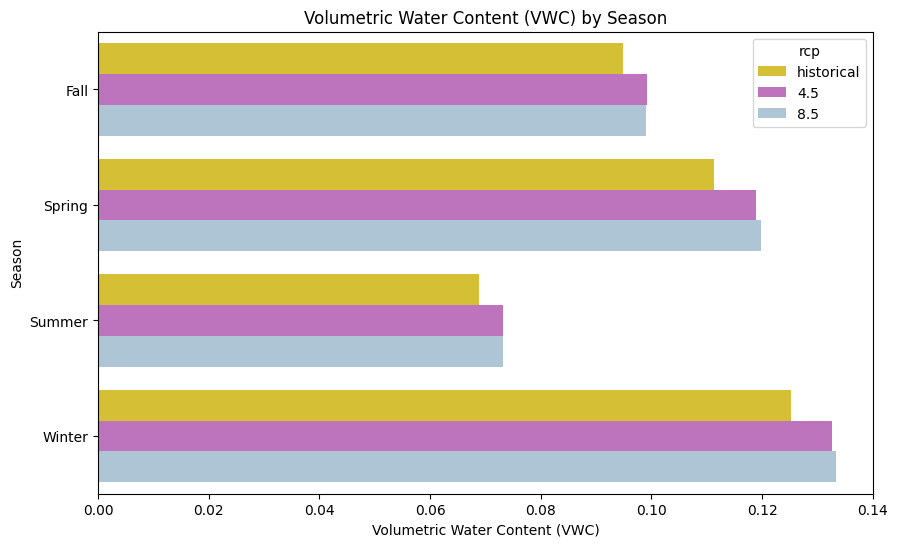

In [196]:
colors = ["#EED21B", "#CA68C8", "#A7C6DA"] 
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=vwc_grouped, x="vwc", y="season", hue="rcp", orient="h", errorbar=None)

plt.xlabel("Volumetric Water Content (VWC)")
plt.ylabel("Season")
plt.title("Volumetric Water Content (VWC) by Season")

ax.set_yticklabels(["Fall", "Spring", "Summer", "Winter"])

plt.show()

### Summer dataset

#### First Visualization

In [197]:
# load the data
summer = pd.read_csv('./data/cleaned_data/summer_data.csv')

# further data processing
summer_copy = summer.copy()
summer_copy = summer.drop(['long', 'lat', 'rcp'], axis=1)

summer_copy = summer_copy.groupby(['year']).mean().reset_index()

# convert the year column to string type
summer_copy['year'] = summer_copy['year'].astype('str')

summer_copy.to_csv('./data/cleaned_data/summer_data_2.csv', index=True)
summer_copy.head()

,year,drysoildays_summer_whole,evap_summer,nondryswa_summer_whole,ppt_summer,tmax_summer,vwc_summer_whole
0,1980,7.856000,2.876526,0.271869,3.992827,36.821592,0.067372
1,1981,6.880705,4.098247,0.213244,9.247074,37.152125,0.066236
2,1982,7.139391,3.789916,0.298272,9.448209,36.545367,0.070423
3,1983,6.439958,4.049732,0.311255,10.045459,34.954063,0.070878
4,1984,6.791979,4.043963,0.246205,9.134468,35.494011,0.068098


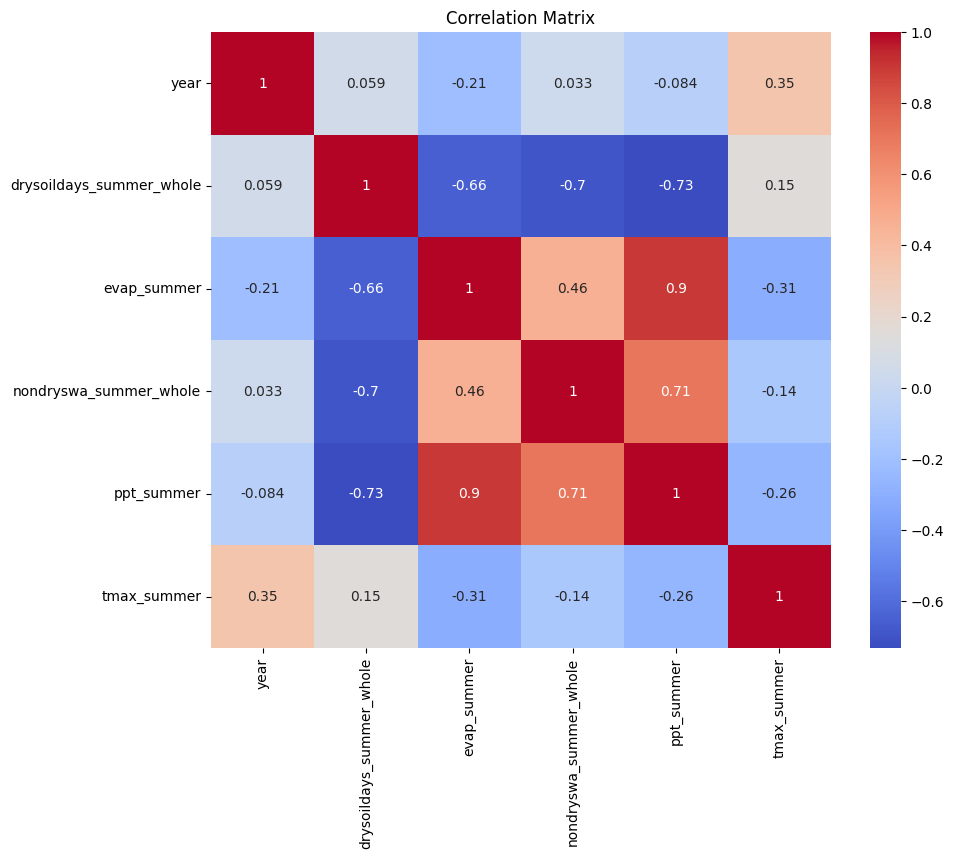

In [18]:
# plot a correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(summer_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# plot a line graph of drysoildays_summer_whole, evap_summer, nondryswa_summer_whole, ppt_summer, and tmax_summer
fig = px.line(summer_copy, x='year', y=['drysoildays_summer_whole', 'evap_summer', 'ppt_summer'], 
              hover_name='year', template='simple_white', color_discrete_sequence=["#EED21B", "#CA68C8", "#A7C6DA"])

fig.for_each_trace(lambda trace: trace.update(name = trace.name.replace('drysoildays_summer_whole', 'Days of Dry Soil (< -3.9 MPa)')
                                                      .replace('evap_summer', 'Evaporation')
                                                      .replace('ppt_summer', 'Precipitation')))

fig.update_traces(mode = 'markers+lines', hovertemplate=None)
fig.update_layout(title='Something of the Summer Data', xaxis_title='Year', yaxis_title='Values', hovermode = 'x', legend_title='Summer Indicators')

fig.show()

In [198]:
# plot out relatiionship between VWC and evaporation and precipitation
summer

,long,lat,year,rcp,drysoildays_summer_whole,evap_summer,nondryswa_summer_whole,ppt_summer,tmax_summer,vwc_summer_whole
0,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050,NaN
1,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050,NaN
2,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050,NaN
3,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050,NaN
4,-110.0472,37.60413,1980,historical,0.000,1.560,0.032,7.44,37.104,0.041876
...,...,...,...,...,...,...,...,...,...,...
69618,-109.9659,37.62525,2024,8.5,0.000,3.557,0.552,7.44,37.104,0.091433
69619,-109.9659,37.62525,2024,8.5,0.000,2.398,0.107,7.44,37.104,0.086355
69620,-109.9659,37.62525,2024,8.5,0.000,3.000,0.595,7.44,37.104,0.091992
69621,-109.9659,37.62525,2024,8.5,0.000,3.702,0.121,7.44,37.104,0.087115


In [201]:
# get rid of null values
summer = summer.dropna().reset_index(drop=True)
summer

,long,lat,year,rcp,drysoildays_summer_whole,evap_summer,nondryswa_summer_whole,ppt_summer,tmax_summer,vwc_summer_whole
0,-110.0472,37.60413,1980,historical,0.0,1.560,0.032,7.44,37.104,0.041876
1,-110.0472,37.60413,1981,historical,0.0,5.043,0.034,7.44,37.104,0.042639
2,-110.0472,37.60413,1982,historical,0.0,4.528,0.199,7.44,37.104,0.045610
3,-110.0472,37.60413,1983,historical,0.0,5.170,0.096,7.44,37.104,0.044141
4,-110.0472,37.60413,1984,historical,0.0,5.230,0.045,7.44,37.104,0.043179
...,...,...,...,...,...,...,...,...,...,...
22744,-109.9659,37.62525,2024,8.5,0.0,3.557,0.552,7.44,37.104,0.091433
22745,-109.9659,37.62525,2024,8.5,0.0,2.398,0.107,7.44,37.104,0.086355
22746,-109.9659,37.62525,2024,8.5,0.0,3.000,0.595,7.44,37.104,0.091992
22747,-109.9659,37.62525,2024,8.5,0.0,3.702,0.121,7.44,37.104,0.087115


#### Second Visualization

In [143]:
# spider chart of summer data
summer_copy_2 = summer.copy()
summer_copy_2

,long,lat,year,rcp,drysoildays_summer_whole,evap_summer,nondryswa_summer_whole,ppt_summer,tmax_summer
0,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050
1,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050
2,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050
3,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050
4,-110.0472,37.60413,1980,historical,0.000,1.560,0.032,7.44,37.104
...,...,...,...,...,...,...,...,...,...
69618,-109.9659,37.62525,2024,8.5,0.000,3.557,0.552,7.44,37.104
69619,-109.9659,37.62525,2024,8.5,0.000,2.398,0.107,7.44,37.104
69620,-109.9659,37.62525,2024,8.5,0.000,3.000,0.595,7.44,37.104
69621,-109.9659,37.62525,2024,8.5,0.000,3.702,0.121,7.44,37.104


In [144]:
# drop unnecessary columns
summer_copy_2 = summer_copy_2.drop(['long', 'lat', 'rcp'], axis=1)

In [151]:
summer_mean = summer_copy_2.groupby(['year']).mean().reset_index()
# normalize each column
scaler = MinMaxScaler()
normalization = ['drysoildays_summer_whole', 'evap_summer', 'nondryswa_summer_whole', 'ppt_summer', 'tmax_summer']
summer_norm = summer_mean.copy()
summer_norm[normalization] = scaler.fit_transform(summer_norm[normalization])

# save the normalized data to a csv file
summer_norm.to_csv('./data/cleaned_data/summer_data_normalized.csv', index=False)

summer_norm

,year,drysoildays_summer_whole,evap_summer,nondryswa_summer_whole,ppt_summer,tmax_summer
0,1980,0.514474,0.000000,0.416921,0.000000,0.684300
1,1981,0.255970,0.832378,0.101002,0.577175,0.792399
2,1982,0.324536,0.622308,0.559199,0.599269,0.593962
3,1983,0.139149,0.799324,0.629162,0.664877,0.073535
4,1984,0.232453,0.795393,0.278620,0.564805,0.250122
5,1985,0.326470,0.088161,0.436613,0.190075,0.779893
6,1986,0.291818,0.664557,0.376677,0.614292,0.222361
7,1987,0.204933,0.604053,0.833924,0.733650,0.000000
8,1988,0.329069,0.650974,0.265041,0.502173,0.336115
9,1989,0.342523,0.357455,0.222188,0.354591,0.926105


In [162]:
display(Javascript("""
    <div class="flourish-embed flourish-radar" data-src="visualisation/17966848"><script src="https://public.flourish.studio/resources/embed.js"></script></div>
"""))

<IPython.core.display.Javascript object>

### Summer vs. Winter Dataset

In [20]:
# load the data
summer_winter = pd.read_csv('./data/cleaned_data/summer_winter_data.csv')
summer_winter.head()

/var/folders/27/cc8xpbnj4vgc0f2m9xmmtc_r0000gn/T/ipykernel_2972/3445449044.py:2: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



,long,lat,year,rcp,ppt_annual,ppt_summer,ppt_winter,t_summer,t_winter,tmax_summer,tmin_winter
0,-110.0472,37.60413,1980,historical,13.79,2.69,13.79,23.15924,0.964835,37.05,NaN
1,-110.0472,37.60413,1980,historical,2.69,2.69,13.79,23.15924,0.964835,37.05,NaN
2,-110.0472,37.60413,1980,historical,13.79,2.69,13.79,23.15924,0.964835,37.05,NaN
3,-110.0472,37.60413,1980,historical,2.69,2.69,13.79,23.15924,0.964835,37.05,NaN
4,-110.0472,37.60413,1980,historical,NaN,NaN,NaN,NaN,NaN,NaN,-12.45


In [87]:
df.columns

Index(['long', 'lat', 'year', 'timeperiod', 'rcp', 'scenario', 'treecanopy',
       'ann_herb', 'bare', 'herb', 'litter', 'shrub',
       'drysoildays_summer_whole', 'evap_summer',
       'extremeshorttermdrystress_summer_whole', 'frostdays_winter',
       'nondryswa_summer_whole', 'ppt_winter', 'ppt_summer', 'ppt_annual',
       't_winter', 't_summer', 't_annual', 'tmax_summer', 'tmin_winter',
       'vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole',
       'vwc_fall_whole'],
      dtype='object')